In [1]:
# 데이터 수집
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge

In [2]:
boston = load_boston()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [3]:
# 3. 데이터 전처리

In [4]:
# 4. 탐색적 데이터 분석
x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
y = pd.DataFrame(boston['target'], columns=['Price'])
y

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:
# 5. 모델 생성 - 선형회귀 특성 확장
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
extended_x_train = x_train.copy()

In [10]:
ridge = Ridge(alpha=10)

In [11]:
ridge.fit(extended_x_train, y_train)

Ridge(alpha=10)

In [12]:
extended_x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


In [13]:
# extended_x_train(특성 확장 코드)의 각 컬럼들을 서로 한 번씩 곱해서 새로운 컬럼 추가

for col1 in x_train.columns: # 13번 반복
    for col2 in x_train.columns: # 13번 반복
        extended_x_train[col1 + 'x' + col2] = x_train[col1]*x_train[col2]

C:\Users\user\AppData\Local\Temp\ipykernel_16672\1204844740.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_x_train[col1 + 'x' + col2] = x_train[col1]*x_train[col2]
C:\Users\user\AppData\Local\Temp\ipykernel_16672\1204844740.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_x_train[col1 + 'x' + col2] = x_train[col1]*x_train[col2]
C:\Users\user\AppData\Local\Temp\ipykernel_16672\1204844740.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

C:\Users\user\AppData\Local\Temp\ipykernel_16672\1204844740.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_x_train[col1 + 'x' + col2] = x_train[col1]*x_train[col2]
C:\Users\user\AppData\Local\Temp\ipykernel_16672\1204844740.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_x_train[col1 + 'x' + col2] = x_train[col1]*x_train[col2]
C:\Users\user\AppData\Local\Temp\ipykernel_16672\1204844740.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

In [14]:
extended_x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,...,9.71,4.92297,67.49421,859.335,27.787107,77.68,2980.97,168.954,3803.4070,94.2841
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,...,0.00,4.08044,58.89468,172.900,52.238524,39.52,3013.40,189.696,3724.1672,97.6144
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,...,0.00,4.87064,78.48786,617.934,72.104818,68.28,3414.00,188.908,4452.4250,129.5044
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,...,0.00,6.51332,74.72916,827.838,69.117015,62.15,3865.73,188.936,4917.3080,154.5049
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,...,0.00,18.08856,141.29856,2373.624,43.889400,639.36,17742.24,538.128,3392.8704,709.6896


In [15]:
lr2 = LinearRegression()
lr2.fit(extended_x_train, y_train)

LinearRegression()

In [16]:
extended_x_test = x_test.copy()

In [17]:
for col1 in x_train.columns: # 13번 반복, 컬럼확장
    # x_train.columns는 바뀌지 않는다.
    for col2 in x_train.columns: # 13번 반복
        extended_x_test[col1 + 'x' + col2] = x_test[col1]*x_test[col2]

C:\Users\user\AppData\Local\Temp\ipykernel_16672\509211211.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_x_test[col1 + 'x' + col2] = x_test[col1]*x_test[col2]
C:\Users\user\AppData\Local\Temp\ipykernel_16672\509211211.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_x_test[col1 + 'x' + col2] = x_test[col1]*x_test[col2]
C:\Users\user\AppData\Local\Temp\ipykernel_16672\509211211.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whi

C:\Users\user\AppData\Local\Temp\ipykernel_16672\509211211.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_x_test[col1 + 'x' + col2] = x_test[col1]*x_test[col2]
C:\Users\user\AppData\Local\Temp\ipykernel_16672\509211211.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_x_test[col1 + 'x' + col2] = x_test[col1]*x_test[col2]
C:\Users\user\AppData\Local\Temp\ipykernel_16672\509211211.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whi

In [18]:
extended_x_train.shape

(404, 182)

In [19]:
extended_x_test.shape

(102, 182)

In [20]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_train_list = [] # train 데이털르 담아 줄빈 리스트 
ridge_test_list = [] # test 데이터를 담아 줄 빈 리스트

In [21]:
for i in alpha_list:
    ridge = Ridge(alpha = i)
    ridge.fit(extended_x_train, y_train)
    
    # train 데이터
    train_pred = ridge.predict(extended_x_train)
    ridge_train_rmse = mean_squared_error(train_pred, y_train)**0.5
    ridge_train_list.append(ridge_train_rmse)
    
    # test 데이터
    test_pred = ridge.predict(extended_x_test)
    ridge_test_rmse = mean_squared_error(test_pred, y_test)**0.5
    ridge_test_list.append(ridge_test_rmse)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.05867e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [22]:
ridge_train_list

[2.0835065507717947,
 2.0850764409779257,
 2.0994432636573346,
 2.1580820650757446,
 2.25711391967692,
 2.4260271435858827,
 2.599646390917805]

In [23]:
ridge_test_list

[5.653502668471952,
 5.874871100553151,
 6.0103239800468335,
 5.783909816750169,
 5.176156539044725,
 4.765046455866838,
 4.8818074802533555]

In [24]:
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

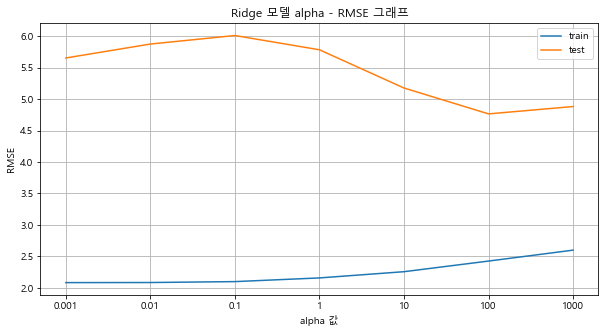

In [25]:
plt.figure(figsize=(10,5))
plt.plot(ridge_train_list, label = 'train')
plt.plot(ridge_test_list, label = 'test')
plt.title('Ridge 모델 alpha - RMSE 그래프')
plt.xlabel('alpha 값')
plt.xticks(np.arange(7), alpha_list) # x축 범위 설정(x축 값의 개수, 바꿔줄 값)
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()